<a href="https://colab.research.google.com/github/ulfiizza27/2141720052-Machine-Learning-2023/blob/main/Week%209/TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Nama                                | No | NIM        |
| ----------------------------------- | -- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | 26 | 2141720052 |

# **Tugas**

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
2. Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
3. ANN diimplementasikan dengan menggunakan tensorflow.
4. DIKERJAKAN SECARA BERKELOMPOK
5. JELASKAN HASIL YANG ANDA DAPATKAN,
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

# **Jawab**

### Langkah 1: Impor Library

In [1]:
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

### Langkah 2: Muat Data MNIST dan Pra-Pemrosesan
- Pra-pemrosesan data meliputi normalisasi dan ekstraksi fitur menggunakan PCA.

In [2]:
mnist = datasets.fetch_openml("mnist_784")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Melihat dimensi data
print("Jumlah sampel:", mnist.data.shape[0])  # Jumlah sampel/data points
print("Dimensi setiap sampel:", mnist.data.shape[1])  # Dimensi setiap sampel
print("Jumlah kelas:", len(set(mnist.target)))  # Jumlah kelas (unik)

Jumlah sampel: 70000
Dimensi setiap sampel: 784
Jumlah kelas: 10


In [4]:
# Mengambil data dan label
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

In [5]:
X.shape

(70000, 784)

In [6]:
# Scaling data menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Menampilkan 5 data awal
print(X_scaled[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
# Ekstraksi fitur menggunakan PCA dengan n_components 300
pca = PCA(n_components=300)
X_pca = pca.fit_transform(X_scaled)

### Langkah 3: Membagi Data Menjadi Data Pelatihan dan Data Pengujian

In [9]:
# Memisahkan data menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

### Langkah 4: Membangun Model ANN

In [10]:
# Membuat model ANN
model = Sequential()

# Tambahkan lapisan input
model.add(Dense(units=128, activation='relu', input_dim=300))  # 128 unit pada lapisan tersembunyi pertama

# Tambahkan lapisan tersembunyi pertama
model.add(Dense(units=64, activation='relu'))  # 64 unit pada lapisan tersembunyi kedua

# Tambahkan lapisan tersembunyi kedua
model.add(Dense(units=32, activation='relu'))  # 32 unit pada lapisan tersembunyi ketiga

# Tambahkan lapisan output
model.add(Dense(units=10, activation='softmax'))  # 10 unit pada lapisan output untuk klasifikasi 10 kelas

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Tampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 49194 (192.16 KB)
Trainable params: 49194 (192.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Langkah 5: Melatih Model ANN

In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
700/700 [==============================] - 6s 8ms/step - loss: 0.3695 - accuracy: 0.8924 - val_loss: 0.1555 - val_accuracy: 0.9528
Epoch 2/10
700/700 [==============================] - 2s 3ms/step - loss: 0.1028 - accuracy: 0.9688 - val_loss: 0.1161 - val_accuracy: 0.9646
Epoch 3/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0590 - accuracy: 0.9824 - val_loss: 0.1116 - val_accuracy: 0.9657
Epoch 4/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0359 - accuracy: 0.9895 - val_loss: 0.1103 - val_accuracy: 0.9660
Epoch 5/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0216 - accuracy: 0.9937 - val_loss: 0.1224 - val_accuracy: 0.9656
Epoch 6/10
700/700 [==============================] - 3s 4ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.1225 - val_accuracy: 0.9692
Epoch 7/10
700/700 [==============================] - 2s 3ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.1349 - val_accuracy: 0.9673
Epoch 

### Langkah 5: Evaluasi Model
- Melakukan evaluasi pada data pelatihan dan data pengujian.
- Membuat confusion matrix dan menghitung akurasi.

In [13]:
# Melakukan evaluasi model pada data pelatihan
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy:.4f}')

1750/1750 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9919
Training Loss: 0.0361
Training Accuracy: 0.9919


In [14]:
# Melakukan evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

438/438 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.9689
Loss: 0.1611
Accuracy: 0.9689


In [15]:
# Memprediksi label kelas dari data pengujian
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_classes)

# Mencetak confusion matrix
print("Confusion Matrix:")
print(confusion_mtx)

438/438 [==============================] - 1s 2ms/step
Confusion Matrix:
[[1321    1    5    0    2    7    2    1    3    1]
 [   0 1579    9    2    1    0    0    3    4    2]
 [   9    7 1335    4    3    2    8    3    8    1]
 [   1    3   11 1382    0   13    1    9    9    4]
 [   5    1    5    0 1259    3    4    4    3   11]
 [   1    1    0   14    0 1244    4    1    8    0]
 [   8    0    3    1    2   20 1358    0    4    0]
 [   3    3   14    4    6    1    0 1463    3    6]
 [   5    9    8   17    3   15    3    5 1288    4]
 [   7    2    1   16   20    6    0   26    6 1336]]


438/438 [==============================] - 1s 3ms/step
Akurasi Model: 96.89%


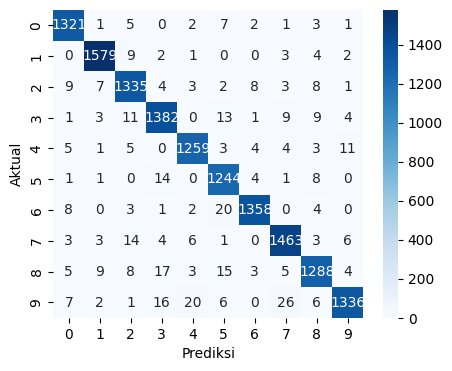

In [19]:
# Prediksi label
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model: {:.2f}%".format(accuracy * 100))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()